In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [4]:
!kaggle competitions download -c 2021-ml-midterm-p4

  0% 0.00/28.9k [00:00<?, ?B/s]
100% 28.9k/28.9k [00:00<00:00, 11.0MB/s]
  0% 0.00/6.77k [00:00<?, ?B/s]
100% 6.77k/6.77k [00:00<00:00, 6.84MB/s]
  0% 0.00/615 [00:00<?, ?B/s]
100% 615/615 [00:00<00:00, 1.26MB/s]
  0% 0.00/29.1k [00:00<?, ?B/s]
100% 29.1k/29.1k [00:00<00:00, 28.2MB/s]
  0% 0.00/7.51k [00:00<?, ?B/s]
100% 7.51k/7.51k [00:00<00:00, 19.4MB/s]


In [69]:
train=pd.read_csv('train_update.csv')
test=pd.read_csv('test_update.csv')
sample=pd.read_csv('sample_submit.csv')

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   404 non-null    int64  
 1   a       404 non-null    float64
 2   b       404 non-null    float64
 3   c       404 non-null    float64
 4   d       404 non-null    int64  
 5   e       404 non-null    float64
 6   f       404 non-null    float64
 7   g       404 non-null    float64
 8   h       404 non-null    float64
 9   i       404 non-null    int64  
 10  j       404 non-null    int64  
 11  k       404 non-null    float64
 12  l       404 non-null    float64
 13  m       404 non-null    float64
 14  price   404 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 47.5 KB


In [71]:
X_train=train.drop(['index','price'],axis=1)
y_train=train['price']
X_test=test.drop('index',axis=1)

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       404 non-null    float64
 1   b       404 non-null    float64
 2   c       404 non-null    float64
 3   d       404 non-null    int64  
 4   e       404 non-null    float64
 5   f       404 non-null    float64
 6   g       404 non-null    float64
 7   h       404 non-null    float64
 8   i       404 non-null    int64  
 9   j       404 non-null    int64  
 10  k       404 non-null    float64
 11  l       404 non-null    float64
 12  m       404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 41.2 KB


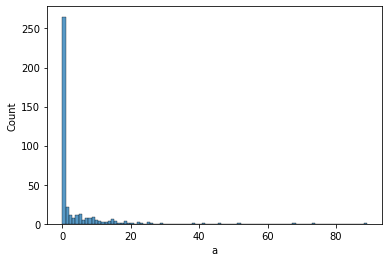

In [73]:
sns.histplot(X_train,x='a')

스케일링이 필요해 보임. 

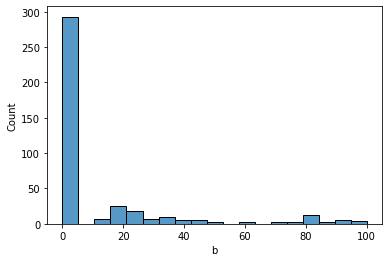

In [74]:
sns.histplot(X_train,x='b')

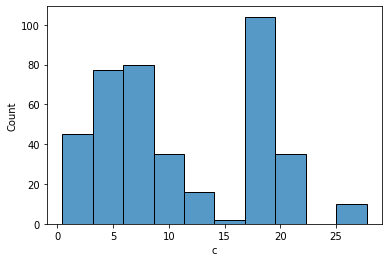

In [75]:
sns.histplot(X_train,x='c')

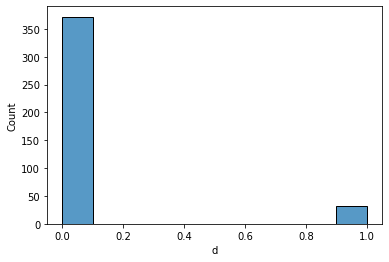

In [76]:
sns.histplot(X_train,x='d')

In [77]:
col=X_train.columns

for i in col:
  print(X_train[i].value_counts())
  print('\n')

0.01501     2
14.33370    2
0.08265     1
0.97617     1
0.03502     1
           ..
0.06162     1
12.80230    1
0.72580     1
0.78570     1
0.03578     1
Name: a, Length: 402, dtype: int64


0.0      293
20.0      19
80.0      11
22.0       9
25.0       9
12.5       7
40.0       6
90.0       5
45.0       5
30.0       5
21.0       4
35.0       3
34.0       3
95.0       3
52.5       3
75.0       3
33.0       3
60.0       3
85.0       2
70.0       2
28.0       2
100.0      1
18.0       1
82.5       1
17.5       1
Name: b, dtype: int64


18.10    104
19.58     23
8.14      18
6.20      13
21.89     12
        ... 
4.95       1
2.01       1
4.39       1
2.97       1
3.75       1
Name: c, Length: 72, dtype: int64


0    372
1     32
Name: d, dtype: int64


0.538    19
0.713    17
0.437    15
0.871    13
0.489    13
         ..
0.422     1
0.415     1
0.458     1
0.385     1
0.460     1
Name: e, Length: 76, dtype: int64


5.713    3
6.167    3
6.229    3
6.951    2
5.813    2
        ..
6.816

d는 연속형 변수가 아닌가벼

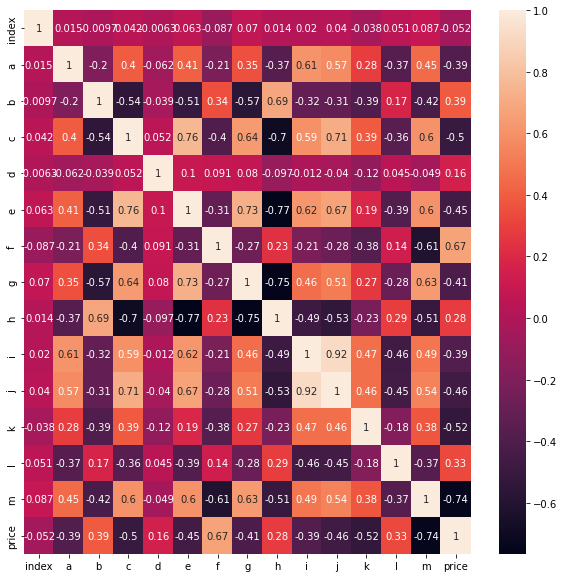

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [78]:
train['i_j']=train['i']*train['j']
train['g_e']=train['g']*train['e']
train['e_c']=train['e']*train['c']

In [79]:
test['i_j']=test['i']*test['j']
test['g_e']=test['g']*test['e']
test['e_c']=test['e']*test['c']

In [80]:
X_train=train.drop(['index','price'],axis=1)
y_train=train['price']
X_test=test.drop('index',axis=1)

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       404 non-null    float64
 1   b       404 non-null    float64
 2   c       404 non-null    float64
 3   d       404 non-null    int64  
 4   e       404 non-null    float64
 5   f       404 non-null    float64
 6   g       404 non-null    float64
 7   h       404 non-null    float64
 8   i       404 non-null    int64  
 9   j       404 non-null    int64  
 10  k       404 non-null    float64
 11  l       404 non-null    float64
 12  m       404 non-null    float64
 13  i_j     404 non-null    int64  
 14  g_e     404 non-null    float64
 15  e_c     404 non-null    float64
dtypes: float64(12), int64(4)
memory usage: 50.6 KB


In [66]:
#스케일링

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [83]:
X_train['d'].value_counts()

0    372
1     32
Name: d, dtype: int64

## KNN

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn_r=KNeighborsRegressor()
knn_r.fit(X_train,y_train)
knn_r_pred=knn_r.predict(X_test)

In [47]:
knn_r_sample=sample.copy()
knn_r_sample['price']=knn_r_pred
knn_r_sample.to_csv('knn_r.csv',index=False)

In [48]:
knn_r_sample

,index,price
0,0,29.24
1,1,24.32
2,2,20.22
3,3,21.82
4,4,18.04
...,...,...
97,97,23.88
98,98,35.86
99,99,20.22
100,100,14.74


In [51]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [52]:
rf_sample=sample.copy()
rf_sample['price']=rf_pred
rf_sample.to_csv('rf.csv',index=False)

In [53]:
rf_sample

,index,price
0,0,29.913
1,1,27.641
2,2,19.608
3,3,20.522
4,4,20.156
...,...,...
97,97,23.441
98,98,42.312
99,99,20.903
100,100,16.464


In [84]:
train=pd.read_csv('train_update.csv')
test=pd.read_csv('test_update.csv')
sample=pd.read_csv('sample_submit.csv')

In [85]:
#스케일링

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaled_X_train=sc.fit_transform(X_train)
scaled_X_test=sc.transform(X_test)

In [86]:
from sklearn.neighbors import KNeighborsRegressor

knn_r=KNeighborsRegressor()
knn_r.fit(scaled_X_train,y_train)
knn_r_pred=knn_r.predict(scaled_X_test)

In [87]:
knn_r_sample1=sample.copy()
knn_r_sample1['price']=knn_r_pred
knn_r_sample1.to_csv('knn_r1.csv',index=False)

In [88]:
from xgboost import XGBRegressor

xgb_r=XGBRegressor()
xgb_r.fit(scaled_X_train,y_train)
xgb_pred=xgb_r.predict(scaled_X_test)

xgb_sample=sample.copy()
xgb_sample['price']=xgb_pred
xgb_sample.to_csv('xgb.csv',index=False)

[08:51:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


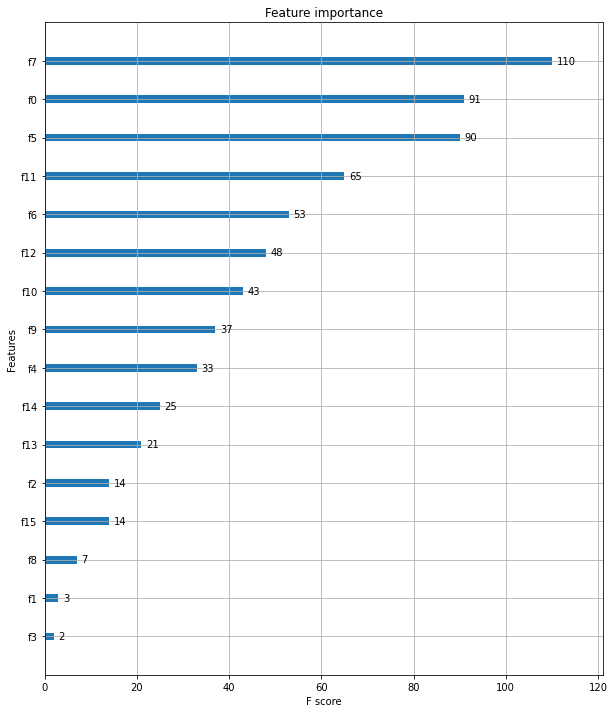

In [89]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
#사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_r,ax=ax)

In [90]:
train['i_j']=train['i']*train['j']
train['g_e']=train['g']*train['e']
train['e_c']=train['e']*train['c']

In [91]:
test['i_j']=test['i']*test['j']
test['g_e']=test['g']*test['e']
test['e_c']=test['e']*test['c']

In [92]:
X_train=train.drop(['index','price'],axis=1)
y_train=train['price']
X_test=test.drop('index',axis=1)

In [94]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaled_X_train=sc.fit_transform(X_train)
scaled_X_test=sc.transform(X_test)

In [95]:
from xgboost import XGBRegressor

xgb_r1=XGBRegressor()
xgb_r1.fit(scaled_X_train,y_train)
xgb_pred1=xgb_r1.predict(scaled_X_test)

xgb_sample1=sample.copy()
xgb_sample1['price']=xgb_pred1
xgb_sample1.to_csv('xgb1.csv',index=False)

[08:55:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


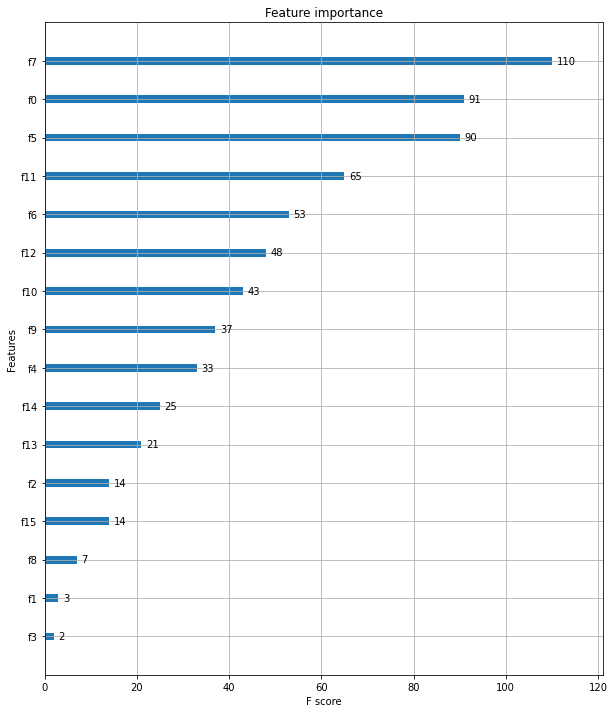

In [96]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
#사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_r1,ax=ax)